In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_dlim_tfidf.csv")

In [3]:
df_rf.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

Splitting dependent and independent variables

In [4]:
X = df_rf.drop(['index', 'X..D-Limonene'], axis = 1)
y = df_rf[['X..D-Limonene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.34177215],
       [0.34177215],
       [0.34177215],
       ...,
       [0.24050633],
       [0.24050633],
       [0.24050633]])

<AxesSubplot:ylabel='Count'>

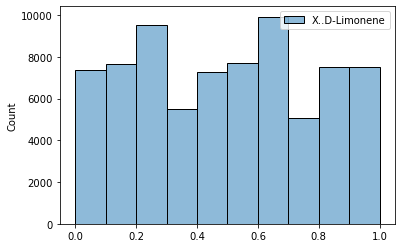

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_9372/350139188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor()

In [10]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_rfreg)

0.05364446960100501

In [12]:
mean_squared_error(y_val, y_pred_rfreg)

0.011899109827375761

In [13]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.10908304097051824

In [14]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9745495339855069

In [15]:
#val
r2_score(y_val, y_pred_rfreg)

0.8588768832246636

Residual plots for each target variable

Feature Selection

In [16]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [17]:
df_feat

,features,score
0,tfidf_0,0.001263
1,tfidf_1,0.001094
2,tfidf_2,0.000849
3,tfidf_3,0.001256
4,tfidf_4,0.000900
...,...,...
464,tree,0.000389
465,tropical,0.001640
466,vanilla,0.001697
467,violet,0.000054


In [18]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [19]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
433,diesel,1.487013e-01
388,hybrid,3.737938e-02
389,indica,2.394308e-02
329,tfidf_329,1.775884e-02
272,tfidf_272,1.335973e-02
168,tfidf_168,1.190080e-02
145,tfidf_145,1.060210e-02
441,lemon,1.055308e-02
345,tfidf_345,9.614425e-03
149,tfidf_149,9.595636e-03


In [20]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [21]:
selector.estimator_.feature_importances_

array([1.28505435e-03, 1.05281616e-03, 8.00033088e-04, 1.24961745e-03,
       8.23825518e-04, 2.66582549e-03, 5.70856167e-03, 3.16183743e-03,
       2.75203503e-04, 2.67745160e-03, 8.85476616e-04, 3.75555835e-03,
       1.02041047e-03, 6.58686694e-04, 3.47731882e-04, 1.00194414e-03,
       3.40867964e-03, 1.46580088e-03, 5.92324584e-04, 1.03472197e-03,
       1.77056430e-03, 1.21545321e-03, 8.85513844e-04, 1.07920835e-03,
       1.57234511e-03, 4.49121598e-04, 1.25946385e-03, 1.50898033e-03,
       9.50884921e-04, 3.71415255e-04, 5.11135255e-03, 9.60080838e-04,
       1.69100364e-03, 4.79693721e-04, 1.77737362e-03, 8.44738992e-04,
       1.23797062e-03, 4.25769248e-03, 2.78175075e-04, 2.00580352e-03,
       2.75670178e-04, 1.41499240e-03, 7.27272224e-04, 5.50281816e-03,
       1.06776750e-03, 9.29742527e-04, 1.37729536e-03, 8.00315320e-04,
       1.59254188e-03, 1.12070187e-03, 9.94667473e-04, 3.86394688e-04,
       1.35382993e-03, 2.22713538e-03, 9.01807810e-04, 3.59167846e-04,
      

In [22]:
selector.threshold_

0.0021321961620469083

In [23]:
mask = selector.get_support()

In [24]:
mask

array([False, False, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,

In [25]:
selected_features = X.columns[mask]

In [26]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_5,tfidf_6,tfidf_7,tfidf_9,tfidf_11,tfidf_16,tfidf_30,tfidf_37,tfidf_43,tfidf_53,...,diesel,earthy,grape,lemon,mint,orange,pungent,skunk,strawberry,sweet
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.198545,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.198545,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,0.145484,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.433694,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,1,1,1,1,1,1,1,1,1,1
74998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,1,1,1,1,1,1,1,1,1,1


Train test split (after Feature Selection)

In [27]:
import joblib

joblib.dump(selector, "selector_rf_tfidf_dlim.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf_dlim.pkl")

['selected_X_rf_tfidf_dlim.pkl']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [29]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [30]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_9372/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [31]:
mean_absolute_error(y_val, y_pred_rfreg)

0.05353010230735233

In [32]:
mean_squared_error(y_val, y_pred_rfreg)

0.011840399101837831

In [33]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.10881359796384747

In [34]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9689397587076154

In [35]:
#val
r2_score(y_val, y_pred_rfreg)

0.8594696358523164

Hyperparameter Tuning

In [36]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [37]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [38]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [39]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [40]:
joblib.dump(rscv, "rscv_rf_tfidf_dlim.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params_dlim.pkl")

['rscv_rf_tfidf_best_params_dlim.pkl']

RF (after Hyperparameter Tuning)

In [41]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 5, min_samples_leaf = 2, max_features = 'auto', max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_9372/2332686591.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [42]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06403348946262577

In [43]:
mean_squared_error(y_val, y_pred_rfreg)

0.013195431461751972

In [44]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.11487136919943094

In [45]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9502306259936719

In [46]:
#val
r2_score(y_val, y_pred_rfreg)

0.8433871381820248

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [47]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [48]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_tfidf_dlim.pkl")
joblib.dump(y_test, "y_test_rfreg_tfidf_dlim.pkl")

['y_test_rfreg_tfidf_dlim.pkl']

In [49]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.06277802290780919

In [50]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.01281261080574468

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.11319280368355879

In [52]:
r2_score(y_test, y_pred_rfreg_test)

0.8499179746235159

Error analysis

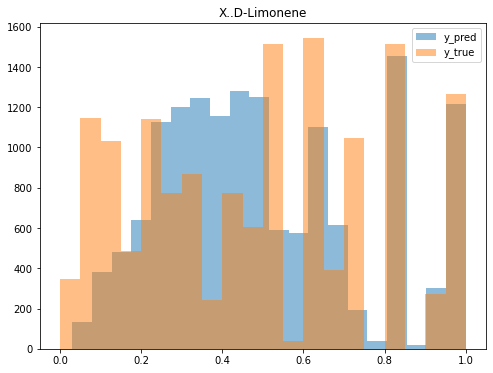

<Figure size 432x288 with 0 Axes>

In [53]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..D-Limonene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_dlim.png')

Pearson R

In [54]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.926
P-value: 0.000


<AxesSubplot:>

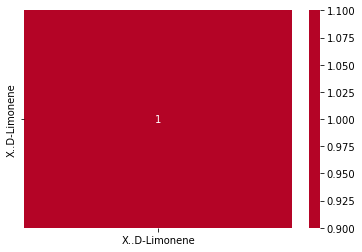

In [55]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)